## libraries used:
- Pandas
- Numpy
- Matplotlib
- Seaborn

----

## Assumptions:
- Assuming data provided is on clients seeking logo designs
- Assuming the first visit to the blog is the sole contributing factor to the user's purchase decision
- Assuming each user only visited their initial blog in their lifetime
- Assuming userid from both tables are the same
- Assuming all userid in blog-first-visit are unique
- Assuming all userid in purchases are in blog-first-visit userid

----

## Concerns Overall:
- Multiple rows of missing userid
- Small sample size, outliers can skew the representation of a category
- It is extremely unlikely that only the first visit to the blog affected the customer's purchase decision, especially when there are purchases made by the customer after 180 days since the initial blog visit
- Sample size extremely low on certain categories, which will lead to extreme fluctuation and inaccuracy in findings
- Very little information are given on the users and their purchases
- Customer purchase data does not include what they have purchased, which can be used to calculate customer value and identify if customer is a client seeking designs or designer

----

## Missing Data:
- User signup date (can be used to increase the accuracy on customer value and to calculate customer lifetime value)
- User visit history
- User purchase history (can be used with visit history to identify if the purchase decision was affected by blogs)

----

## Findings:
- The top five categories with the most user visit are: Designers, Tips, Creative-inspiration, Logo Branding and Trends
- The most common sources are SEO-Unknown and Direct
- The most popular categories don't seem to be the most profitable categories. First place is Tips, followed by designers, creative-inspiration and design-tutorials
- users who visited design-tutorials and logo-und-branding hold the highest customer values. The average customer value across all categories is 42, popular categories such as designers, tips, creative-inspiration, logo-branding and trends have an average of 40 customer value. This metric takes in account of purchase_interval, profit_per_sale and the total profit from a user. However this metric must be taken with a grain of salt due to the skewed numbers from low sample size categories.
- users who visited Design-tutorials have the highest retention rate and purchase amount 
- Looking at the correlation heatmap, the following features have strong positive correlation and are worth while to conduct further investigation:
 - profit & salescount
 - profit & customer_value
 - profit & design-Tutorials
 - profit & logo-und-branding
 - salecount & unsere-designer
 - news trend & source-direct
 - news trend & source-email
 - tendances & source-direct
 
----

## Recommendation:
- From the data given, i would recommend the following categories if the goal was to maximize profit:
 - tips, designers, creative-inspiration, design-tutorials, logo-branding, trends, logo-und-branding, business, crowdsourcing, packaging-label, unsere-designer, design-tips, resources, design-other, art-illustration, nos-designers, marketing-advertising, news-trend, unsere-kunden and freelancing
- If the goal was to maximize long term profit, I would recommend a combination of top 10 profit categories and the top 10 customer value categories. I assume this can bring short term profit as well as maximize long term customer retention rate.
- caveat: I am lacking the domain knowledge and data sample size to make a good recommendation for this question




#### Please see below for the codes and more details

In [897]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on the version of Jupyter
%matplotlib inline

In [898]:
first_visits = pd.read_csv('blog-first-visits.csv')
purchases = pd.read_csv('purchases.csv')

In [899]:
first_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251857 entries, 0 to 251856
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userid       890 non-null     float64
 1   timevisited  251857 non-null  object 
 2   fullpath     251857 non-null  object 
 3   category     250604 non-null  object 
 4   source       251857 non-null  object 
dtypes: float64(1), object(4)
memory usage: 9.6+ MB


#### Changing timevisited to datetime

In [900]:
first_visits['timevisited'] = pd.to_datetime(first_visits['timevisited'], format='%m/%d/%y %H:%M')

In [901]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userid       283 non-null    int64  
 1   timecreated  283 non-null    object 
 2   profit       283 non-null    float64
 3   salecount    283 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.0+ KB


#### Changing timecreated to datetime

In [902]:
purchases['timecreated'] = pd.to_datetime(purchases['timecreated'], format='%m/%d/%y %H:%M')

## Data exploration and processing

#### There are large amount of missing userid in first_visit csv, these anonymous users account for over 99% of the traffic during the two week period.

In [903]:
round(first_visits['userid'].isnull().sum()/ len(first_visits), 3)

0.996

#### The anonymous traffics are dropped because we have no relatable data.

In [904]:
first_visits = first_visits[first_visits['userid'].notna()]

#### I wanted to check if users from first_visits who made a purchase are all included in the purchases userid column. Both dataset showed 170 unique users which checks out!

In [905]:
first_visits['userid'].isin(purchases['userid']).value_counts()

False    720
True     170
Name: userid, dtype: int64

In [906]:
len(purchases.groupby('userid').count())

170

#### 23.6% of the users from first_visits made a purchase in their lifetime. We will look deeper into the 23.6% of the users to see if there are any patterns

In [907]:
round(170/720*100,2)

23.61

#### First, a new dataset is required, we are going to add more features to the purchases table

#### New features created in purchases dataframe, they are:
- category (using first_vist csv to findout the category for each userid in purchases)
- source (using first_vist csv to findout the source for each userid in purchases)
- first_visit (using first_vist csv to findout the firstvisited time for each userid in purchases)
- month (breakdown the datestamp and have month as an individual column)
- year (breakdown the datestamp and have year as an individual column)
- days_diff (when the customer first visited the blog, the number of days they waited before the purchase)
- profit_per_sale (the average profit from each customer, total profit / number of purchases)
- purchase_interval (the average number of days for the customer to make a purchase since their initial visit to the blog)
- customer_value (a very simplistic way to calculate customer value from the data given. Customers with high value have one of the two patterns, either they generated a high amount of profit, or/and they made a purchase shortly after their visit to the blog.





#### The following function accepts the userid from purchases dataframe, matches with first_visit userid column and returns the same row, then the index only takes the category column value and populates the new purchases category column

In [908]:
purchases['category'] = purchases['userid'].apply(lambda x: first_visits[first_visits['userid'] == x].reset_index()['category'])

In [909]:
purchases.head()

,userid,timecreated,profit,salecount,category
0,3745853,2019-06-03 19:19:00,99.00,1,packaging-label
1,3747591,2019-06-05 18:27:00,278.00,1,tips
2,3749880,2019-06-17 17:41:00,188.00,1,creative-inspiration
3,3753193,2019-06-11 10:52:00,323.81,1,designers
4,3753193,2019-06-12 14:57:00,24.00,2,designers


#### Same method is used for the source column in the purchases dataframe

In [910]:
purchases['source'] = purchases['userid'].apply(lambda x: first_visits[first_visits['userid'] == x].reset_index()['source'])

In [911]:
purchases.head()

,userid,timecreated,profit,salecount,category,source
0,3745853,2019-06-03 19:19:00,99.00,1,packaging-label,seo-unknown
1,3747591,2019-06-05 18:27:00,278.00,1,tips,seo-unknown
2,3749880,2019-06-17 17:41:00,188.00,1,creative-inspiration,seo-unknown
3,3753193,2019-06-11 10:52:00,323.81,1,designers,seo-unknown
4,3753193,2019-06-12 14:57:00,24.00,2,designers,seo-unknown


In [912]:
purchases['source'] = purchases['userid'].apply(lambda x: first_visits[first_visits['userid'] == x].reset_index()['source'])

#### Also added timevisited column from first_visits to purchases

In [913]:
purchases['first_visit'] = purchases['userid'].apply(lambda x: first_visits[first_visits['userid'] == x].reset_index()['timevisited'])

In [914]:
purchases.head()

,userid,timecreated,profit,salecount,category,source,first_visit
0,3745853,2019-06-03 19:19:00,99.00,1,packaging-label,seo-unknown,2019-06-03 17:52:00
1,3747591,2019-06-05 18:27:00,278.00,1,tips,seo-unknown,2019-06-03 15:02:00
2,3749880,2019-06-17 17:41:00,188.00,1,creative-inspiration,seo-unknown,2019-06-04 17:08:00
3,3753193,2019-06-11 10:52:00,323.81,1,designers,seo-unknown,2019-06-11 10:11:00
4,3753193,2019-06-12 14:57:00,24.00,2,designers,seo-unknown,2019-06-11 10:11:00


#### New timestamp column created (It shows after the customer's first visit to the blog, the number of days they waited before making the purchase).

In [915]:
purchases['days_diff'] = abs(round((purchases['first_visit'] - purchases['timecreated']) / np.timedelta64(1, 'D'),0))

In [916]:
purchases.head()

,userid,timecreated,profit,salecount,category,source,first_visit,days_diff
0,3745853,2019-06-03 19:19:00,99.00,1,packaging-label,seo-unknown,2019-06-03 17:52:00,0.0
1,3747591,2019-06-05 18:27:00,278.00,1,tips,seo-unknown,2019-06-03 15:02:00,2.0
2,3749880,2019-06-17 17:41:00,188.00,1,creative-inspiration,seo-unknown,2019-06-04 17:08:00,13.0
3,3753193,2019-06-11 10:52:00,323.81,1,designers,seo-unknown,2019-06-11 10:11:00,0.0
4,3753193,2019-06-12 14:57:00,24.00,2,designers,seo-unknown,2019-06-11 10:11:00,1.0


#### Groupby the dataframe by userid, and aggregate quantitative features to get a better overview of each unique user's value. In the customer_value column I have included a +7.3 and * 0.12 in the customer_value formula, they act as weights for the ratio. It is not optimized, however it helps to show a fairly relevant picture of the customer_value.


In [917]:
purchases = purchases.groupby(['userid','category','source'],as_index=False).agg({'profit':'sum', 'salecount': 'max', 'days_diff': 'max'})

In [918]:
purchases['profit_per_sale'] = round(purchases['profit'] / purchases['salecount'], 2)
purchases['purchase_interval'] = round((purchases['days_diff']) / purchases['salecount'], 1)
purchases['customer_value'] = round(purchases['profit_per_sale']/ (purchases['purchase_interval']+6.3)+purchases['profit']*0.12, 2)

### The dataframe below will be used for our analysis, it has lots of information about the unique users.

In [919]:
df = purchases.sort_values(by=['customer_value'], ascending=False)
df.head(10)

,userid,category,source,profit,salecount,days_diff,profit_per_sale,purchase_interval,customer_value
137,3808326,design-tutorials,seo-unknown,2453.78,4,91.0,613.45,22.8,315.53
56,3754257,tips,seo-unknown,838.12,1,1.0,838.12,1.0,215.39
66,3755358,designers,seo-unknown,1720.78,11,380.0,156.43,34.5,210.33
36,3750426,trends,seo-unknown,657.00,1,0.0,657.00,0.0,183.13
150,3844595,design-tutorials,seo-unknown,1435.00,8,287.0,179.38,35.9,176.45
106,3769606,tips,seo-unknown,1315.00,1,152.0,1315.00,152.0,166.11
148,3843951,tips,seo-unknown,1051.00,3,76.0,350.33,25.3,137.21
6,3745242,logo-und-branding,seo-unknown,1078.46,4,124.0,269.61,31.0,136.64
45,3752563,tips,seo-unknown,688.97,1,7.0,688.97,7.0,134.48
100,3765884,trends,direct,915.00,2,282.0,457.50,141.0,112.91


## The following will be the data analysis section

#### The majority of the first visited blog for customers with a purchase history are designers, tips, creative-inspiration and logo-branding. These categories claimed the most of the traffic. We can also see majority of the sources are from seo-unknown and direct. 

No handles with labels found to put in legend.


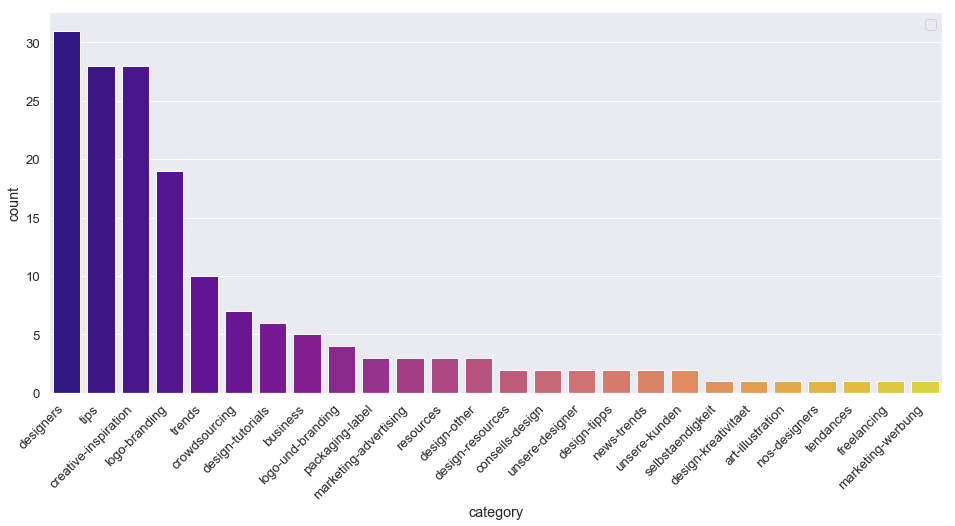

In [920]:
sns.set_style("ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(16,7))
chart = sns.countplot(data=df, x='category', palette='plasma', order=df['category'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(loc='upper right')

In [921]:
profit = df.groupby('category').agg({'profit': 'sum'}).reset_index()


#### The graph below shows the same category order on x axis as the graph above. The most popular categories doesn't seem to be the most profitable categories. First place is Tips, followed by designers, creative-inspiration and design-tutorials.

No handles with labels found to put in legend.


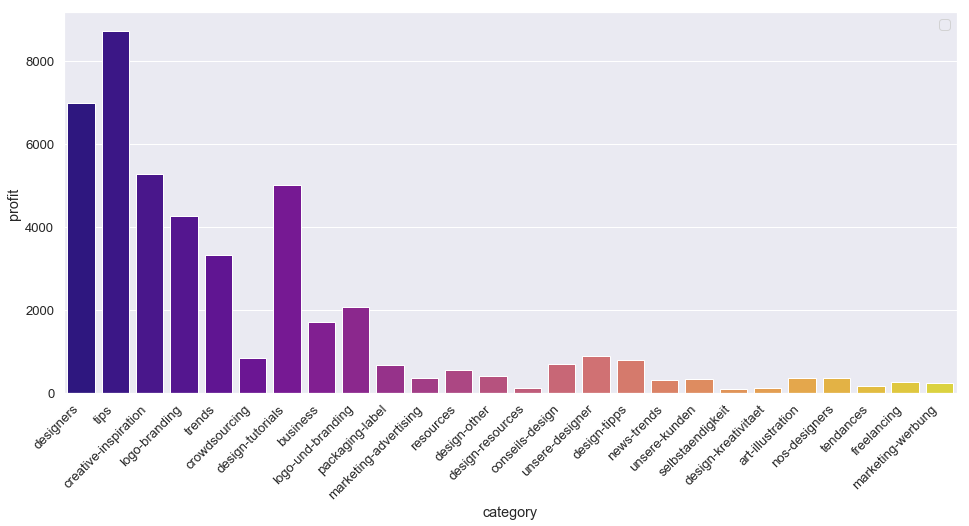

In [922]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.2)
chart = sns.barplot(x='category', palette='plasma',y='profit',data=profit, order=df['category'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(loc='upper right')

#### I think this graph gives a good representation of each category's customer value. The 9 categories to the left of the graph excluding crowdsourcing have an above average customer value, the average across the board is 41, categories with a customer value above this number is a good selection for writing material. However we also need to note down some of the categories with 41+ average have less than 5 in sample size, which means the average of customer value number must be taken with a grain of salt until more samples are included.


No handles with labels found to put in legend.


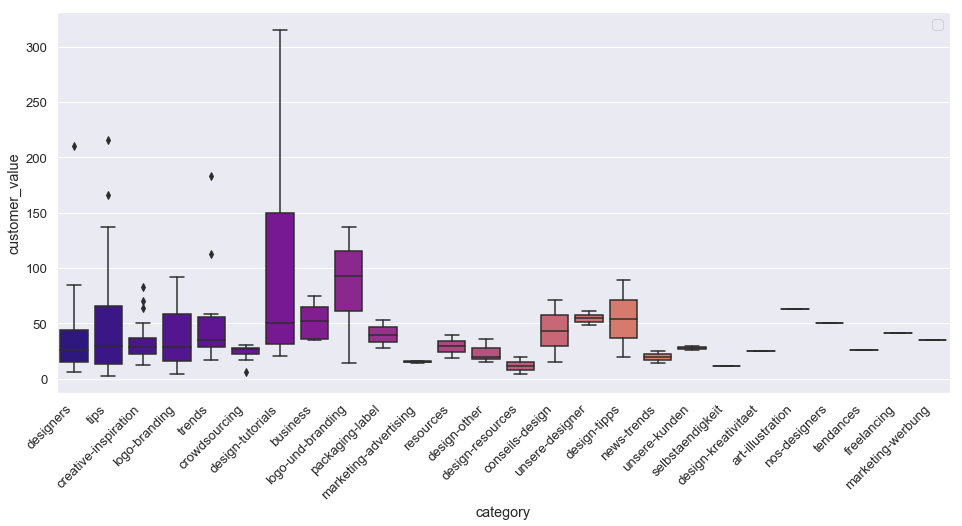

In [923]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.2)
chart = sns.boxplot(x='category', palette='plasma',y='customer_value',data=df, order=df['category'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(loc='upper right')

In [924]:
df.describe()

,userid,profit,salecount,days_diff,profit_per_sale,purchase_interval,customer_value
count,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.788273e+06,265.622249,1.668639,85.390533,180.075385,47.671006,42.289882
std,8.191433e+04,305.602010,1.482926,120.961087,170.992696,65.113338,42.465215
min,3.482021e+06,18.000000,1.000000,0.000000,18.000000,0.000000,2.680000
25%,3.752200e+06,109.000000,1.000000,4.000000,90.000000,4.000000,17.700000
50%,3.757086e+06,168.000000,1.000000,25.000000,120.000000,22.000000,29.290000
75%,3.786869e+06,278.000000,2.000000,123.000000,219.000000,56.000000,51.970000
max,4.198747e+06,2453.780000,11.000000,436.000000,1315.000000,270.000000,315.530000


### Creating a new dataframe for a corrolation matrix

#### Dropping the userid column as ID won't have any corrolation with other features.

In [925]:
df = df.drop(['userid'], axis=1)

#### Convert the worthwhile features into dummy variables so we can check for correlation. Concatenate dummies with the new dataframe

In [926]:
dummies = pd.get_dummies(df[['category', 'source']])
df = df.drop(['category', 'source'], axis=1)
df = pd.concat([df,dummies], axis=1)

#### Correlation heatmap below. hotspots mean highly correlated features.

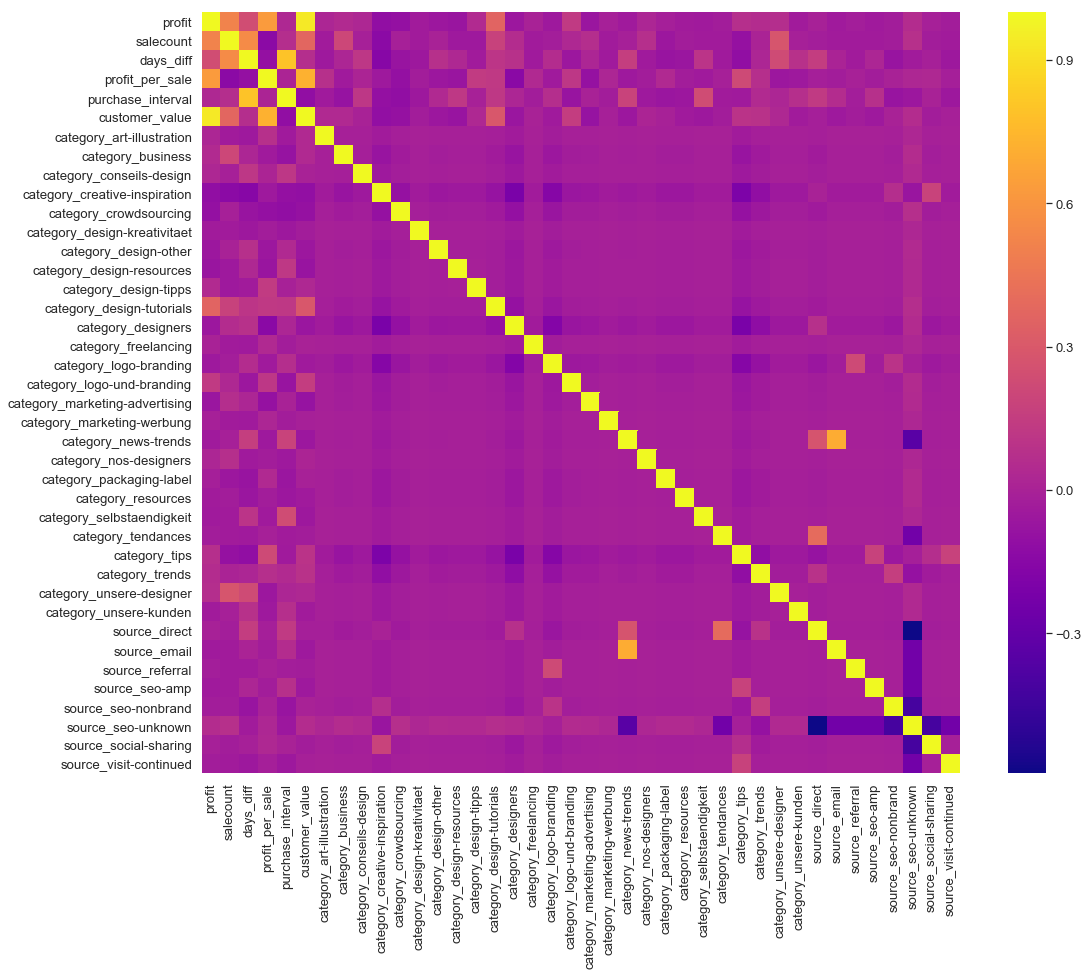

In [927]:
plt.figure(figsize=(17,14))
g = sns.heatmap(df.corr(), cmap='plasma')
sns.set(font_scale=1.2)